### Пономаренко Николай

# Язык Python и библиотеки для анализа данных: задание 1

/Работа выполнена на третьей версии Python./

## 1 Python

1) Чем отличаются типы list и tuple? Какой из них можно использовать в
качестве ключа в dict и добавлять в set? Почему? На какой структуре
данных реализован dict в python? Чем отличается range от xrange в
Python2.x? Что такое list comprehension? Как работают функции map
и reduce в Python?

Во-первых, List является изменяемым типом, а тип tuple не является таковым. Во-вторых, они занимают в памяти разный размер (см. код ниже). Конечно, это не особо существенно, но операции с tuple происходят немного быстрее.

In [1]:
a = tuple(range(1000))
b = list(range(1000))

print(a.__sizeof__())
print(b.__sizeof__())

8024
9088


Так как list является изменяемым типом, то его нельзя использовать в качестве ключа в словаре (так как нехешируемый тип), когда tuple, к счастью, обладает таким свойством. Оба типа можно добавлять в set.

In [2]:
a = (1,2)
b = [1,2] 

c = {a: 1}
print('OK')
c = set(a)
print('OK')
c = set(b)
print('OK')
try:
    c = {b: 1}
except Exception:
    print('Так нельзя:(')

OK
OK
OK
Так нельзя:(


Словарь в Python реализован в виде хэш-таблицы c методом открытой адресации.

xrange() очень похож на range(), но возвращает xrange object вместо list. Это, например, даёт преимущества при работе с большими циклами, так как xrange() не хранит весь list объектов, по которым произвоится итерация.

list comprehension обеспечивает краткий способ создания списков. Обычно применяется при создании новых списков, в которых каждый элемент является результатом некоторых операций, применяемых к каждому члену другой последовательности, или для создания подпоследовательности тех элементов, которые удовлетворяют определенному условию.

map(function, iterable, ...)

Применяет функцию к каждому элементу итерабельного объекта и возвращает объект типа list в качестве результата (во втором Питоне) или объект типа map (третий Питон).

In [3]:
arr = [i for i in range(10)]
print(arr)
mod_arr = list(map(lambda x: x ** 2, arr))
print(mod_arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


reduce(function, iterable[, initializer])

Применяет функцию двух аргументов кумулятивно к элементам итерабельного объекта слева направо, чтобы уменьшить итерабельный объект до одного значения. Пример: reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) вычисляет ((((1+2)+3)+4)+5).

In [4]:
from functools import reduce
reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])

15

2) Напишите рекурсивную функцию, возвращающую $N$-ное число Фибоначчи.
Проверьте работу для небольших $N$. Выясните, для какого
$N$ начинаются проблемы с глубиной рекурсии. Дополнительное задание
для любознательных: попробуйте выяснить, можно ли в Python
изменить допустимую глубину рекурсии.


In [5]:
def fib_rec(N):
    if N == 0 or N == 1:
        return 1
    return fib_rec(N - 1) + fib_rec(N - 2)

In [6]:
# Проверим работу для первых 10 чисел.

for i in range(10):
    print(fib_rec(i))

1
1
2
3
5
8
13
21
34
55


Начиная с $N = 972$ появляются проблемы с глубиной рекурсии.

In [7]:
try:
    fib_rec(972)
except RecursionError:
    print('From here.')

From here.


In [8]:
import sys
sys.getrecursionlimit()

1000

Функция, вызванная выше возвращает текущее значение предела рекурсии, максимальную глубину стека интерпретатора Python. Этот предел предотвращает бесконечную рекурсию из-за переполнения стека. Максимальная глубина рекурсии может быть изменена с помощью sys.setrecursionlimit(limit).

In [9]:
print(sys.getrecursionlimit())
sys.setrecursionlimit(2000)
print(sys.getrecursionlimit())
sys.setrecursionlimit(1000)

1000
2000


3) Попробуйте измерить время работы предыдущей функции при разных $N$.

In [10]:
import time

for i in range(40):
    start_time = time.clock()
    fib_rec(i)
    print("N =", i, "is done in", time.clock() - start_time, "seconds")

N = 0 is done in 3.84e-06 seconds
N = 1 is done in 2.9866666666662767e-06 seconds
N = 2 is done in 4.693333333333216e-06 seconds
N = 3 is done in 4.266666666667349e-06 seconds
N = 4 is done in 6.4000000000001556e-06 seconds
N = 5 is done in 9.813333333334034e-06 seconds
N = 6 is done in 1.450666666666725e-05 seconds
N = 7 is done in 2.602666666666649e-05 seconds
N = 8 is done in 3.797333333333333e-05 seconds
N = 9 is done in 6.91199999999989e-05 seconds
N = 10 is done in 8.234666666666682e-05 seconds
N = 11 is done in 0.00015744 seconds
N = 12 is done in 0.00023850666666666576 seconds
N = 13 is done in 0.00037162666666666795 seconds
N = 14 is done in 0.0006438399999999997 seconds
N = 15 is done in 0.0009787733333333336 seconds
N = 16 is done in 0.0017949866666666682 seconds
N = 17 is done in 0.0021934933333333344 seconds
N = 18 is done in 0.003971413333333333 seconds
N = 19 is done in 0.008821333333333334 seconds
N = 20 is done in 0.011462826666666662 seconds
N = 21 is done in 0.018600

4) Напишите функцию, возвращающую (через запятую) модуль и аргумент
комплексного числа по заданной мнимой и действительной
части. Возможно, вам потребуется импортировать какие-то тригонометрические
функции из модуля math. Приведите примеры работы.
Каков тип возвращаемого вашей функцией значения?

In [11]:
# Для более красивого код будем использовать библиотеку cmath,
# так как в ней есть функция phase().
import cmath

def my_func_complex_num(x, y):
    modulus = abs(complex(x, y))
    
    # phase() не учитывает этот вариант.
    
    if (x == y == 0):
        raise Exception('Undefined.')
        
    arg = cmath.phase(complex(x, y))
    return modulus, arg

In [12]:
# z = 1 + 0j
print(my_func_complex_num(1, 0))

# z = 1 + 1j
print(my_func_complex_num(1, 1))

# z = -3 + -5j
print(my_func_complex_num(-3, -5))

(1.0, 0.0)
(1.4142135623730951, 0.7853981633974483)
(5.830951894845301, -2.1112158270654806)


Тип возвращаемого моей функцией значения - tuple.

In [13]:
type(my_func_complex_num(1, 1))

tuple

5) Напишите docstrings к вашей последней функции. Изучите библиотеку
doctest и попробуйте проверить, что написанные в docstrings примеры
выполняются, без явного копирования кода оттуда (т.е. с помощью
doctest).

In [14]:
# Для более красивого код будем использовать библиотеку cmath,
# так как в ней есть функция phase().
import cmath

"""
Common example.

>>> my_func_complex_num_dt(1, 1)
(1.4142135623730951, 0.7853981633974483)
"""

def my_func_complex_num_dt(x, y):
    
    """
    Returns modulus and arg of complex number x+iy.
    
    Another examples.
    
    >>> my_func_complex_num_dt(0, 1)
    (1.0, 1.5707963267948966)
    
    >>> my_func_complex_num_dt(0, 0)
    Traceback (most recent call last):
      ...
    Exception: Undefined.
    
    """
    
    modulus = abs(complex(x, y))
    
    # phase() не учитывает этот вариант.
    
    if (x == y == 0):
        raise Exception('Undefined.')
        
    arg = cmath.phase(complex(x, y))
    return modulus, arg


if __name__ == "__main__":
    import doctest
    doctest.testmod()

P.S. Я не очень понял, что значит "попробуйте проверить, что написанные в docstrings примеры выполняются, без явного копирования кода оттуда (т.е. с помощью doctest)". Поэтому я просто написал различные примеры проверок коректности моего кода, аналогично тому, что указано в документации.

6) Реализуйте класс комплексных чисел с самым базовым функционалом.
Цель не продемонстрировать умение спроектировать класс из
каждого второго домашнего задания по любому языку программирования,
а посмотреть на особенности реализации классов на питоне.

In [15]:
class Complex_numbers:
    """Class of complex numbers."""
 
    def __init__(self, x = 0, y = 0):
        """
        Constructor.
        x, y - Real and Img parts of complex number.
        Default values: x = y = 0.
        
        """
        self.x = x
        self.y = y
        
        
    def __add__(self, other):
        """
        Redefining of '+' operator.
        """
        
        return Complex_numbers(self.x + other.x, self.y + other.y)
    
    def __repr__(self):
        """
        Redefining of represenation.
        """
            
        return "{}{}{}i".format(self.x, '-' if self.y < 0 else '+', abs(self.y))

In [16]:
a = Complex_numbers(-1, -1)
b = Complex_numbers(0, 1)
c = Complex_numbers()
print(a)
print(b)
print(c)
print(a + b)

-1-1i
0+1i
0+0i
-1+0i


7) Изучите примеры работы с декораторами из официальной документации.
Фактически, декоратор - это функция, которая принимает на
вход другую функцию и возвращает её в модифицированном виде.
Синтаксически предусмотрена возможность использовать декоратор,
написав перед объявлением функции имя_декоратора. Попробуйте
найти реализацию (или сделать сами) кэширующего декоратора и декоратора,
вычисляющего время работы функции. Попробуйте применить
эти декораторы в разной последовательности к функции, вычисляющей
числа Фибоначчи, сравнить и объяснить результаты. Объясните
также, как работают использованные вами декораторы.

In [17]:
def memoize(function):
    dic = {}
    def wrapper(*args, **kwargs):
        if args not in dic:
            dic[args] = function(*args, **kwargs)
        return dic[args]
    return wrapper

Данный декоратор работает следующим образом: создаётся словарь, в котором будут уже подсчитанные значения функции. Далее проверяется, вызывалась ли ранее функция с такими аргументами. Если нет, то вычисляем её значения при данных аргументах, а потом запоминаем его. Возвращаем значения функции от данных аргументов.

In [18]:
@memoize
def fib_rec_decor_m(N):
    if N == 0 or N == 1:
        return 1
    return fib_rec_decor_m(N - 1) + fib_rec_decor_m(N - 2)

In [19]:
fib_rec_decor_m(100)

573147844013817084101

In [20]:
def timer(f):
    is_evaluating = False
    def g(x):
        nonlocal is_evaluating
        if is_evaluating:
            return f(x)
        else:
            start_time = time.clock()
            is_evaluating = True
            try:
                value = f(x)
            finally:
                is_evaluating = False
            end_time = time.clock()
            print('time taken: {time}'.format(time=end_time-start_time))
            return value
    return g


Отметим, что мы не должны считать рекурсивные вызовы функциии отдельно. Поэтому если функция вызывает сама себя, то это значит, что у мы уже начали вычислять время её работы. Тем самым мы замерим время от первого вызова функции до возвращения результата работы рекурсивной функции. 

In [21]:
@timer
def fib_rec_decor_t(N):
    if N == 0 or N == 1:
        return 1
    return fib_rec_decor_t(N - 1) + fib_rec_decor_t(N - 2)

In [22]:
fib_rec_decor_t(32)

time taken: 2.4474073599999997


3524578

In [23]:
@memoize
@timer
def fib_rec_decor_tm(N):
    if N == 0 or N == 1:
        return 1
    return fib_rec_decor_tm(N - 1) + fib_rec_decor_tm(N - 2)

In [24]:
fib_rec_decor_tm(100)

time taken: 0.002246826666677748


573147844013817084101

8) Выясните, чем отличается задание поля x через "self.x =" от объявления
метода с декоратором property.

Рассмотрим следующий пример.

In [25]:
class Person(object):
    """"""
    def __init__(self, first_name, last_name):
        """Конструктор"""
        self.first_name = first_name
        self.last_name = last_name
    
    @property
    def full_name(self):
        """
        Возвращаем полное имя
        """
        return "%s %s" % (self.first_name, self.last_name)

In [26]:
person = Person("Mike", "Driscoll")
 
print(person.full_name) # Mike Driscoll
print(person.first_name) # Mike
try:
    person.full_name = "Jackalope"
except AttributeError:
    print('Нельзя изменить.')
    
person.first_name = "Jackalope"
print('А вот так можно.')
print(person.first_name)

Mike Driscoll
Mike
Нельзя изменить.
А вот так можно.
Jackalope


Декоратор @property превращает метод класса в «getter» в ТОЛЬКО ДЛЯ ЧТЕНИЯ атрибут с тем же именем, а вот заданное поле x через "self.x =" в последствие можно изменить.

9) Напишите setter и getter для полей класса комплексного числа.

In [27]:
class Complex_numbers_decor:
    """Class of complex numbers."""
 
    def __init__(self, x=0, y=0):
        """
        Constructor.
        x, y - Real and Img parts of complex number.
        Default values: x = y = 0.
        
        """
        self._x = x
        self._y = y
    
    @property
    def x(self):
        """I'm the 'x' property."""
        return self._x
    
    @property
    def y(self):
        """I'm the 'y' property."""
        return self._y
    
    @x.setter
    def x(self, val):
        """Set real part."""
        self._x = val
        
    @y.setter
    def y(self, val):
        """Set img part."""
        self._y = val
    
    def __add__(self, other):
        """
        Redefining of '+' operator.
        """
        
        return Complex_numbers(self.x + other.x, self.y + other.y)
    
    def __repr__(self):
        """
        Redefining of represenation.
        """
            
        return "{}{}{}i".format(self.x, '-' if self.y < 0 else '+', abs(self.y))

## 2 Requests/urllib + BeautifulSoup

Скачайте html-код страницы с новостью с любого новостного сайта и, распарсив
его с помощью библиотеки Beautiful Soup или любой другой аналогичной,
получите текст статьи (без html-тегов или вкраплений java script).

In [28]:
import requests
from bs4 import BeautifulSoup

# Почитаем про то, как наша фигуристка заняла лишь второе место :(.

url = "https://lenta.ru/articles/2018/12/09/grand_prix_final/"

# Скачиваю html-код страницы с новостью, преобразую её к типу 'str'.

text = requests.get(url).text

# Распарсиваем её с помощью библиотеки Beautiful Soup.

text_good = BeautifulSoup(text, "lxml")

# Печатаем именно текст статьи.
print(text_good.find(itemprop="articleBody").text)

Три года подряд россиянки не отдавали никому золото в финале Гран-при по фигурному катанию. Елизавета Туктамышева, Евгения Медведева, Алина Загитова: фигуристки сборной России приучили отечественную публику не переживать за судьбу медали высшей пробы. Загитова по всем законам жанра в этом году должна была оформить золотой дубль на льду Ванкувера. Но на ее пути встала Рика Кихира — японка с феноменальным техническим заделом. В чем сила Кихиры и почему действующая олимпийская чемпионка проиграла бывшей юниорке — разбиралась «Лента.ру».Проспорили«Алина Загитова или Евгения Медведева?» — только в таком контексте было принято говорить о женском фигурном катании в последние два сезона. Россиянки выясняли отношения на недосягаемом для всех остальных уровне, будто соревновались в другом, собственном дивизионе. Противостояние двух выдающихся фигуристок, а в этом году еще и двух тренеров, Этери Тутберидзе и Брайана Орсера, захватило внимание всего спортивного мира, не оставив возможности даже по

## 3 NumPy

1) Создайте numpy.ndarray размерностью 3x4x2 и продемонстрируйте разные
способы обращения по индексам из документации NumPy

In [29]:
import numpy as np

a = np.ndarray(shape=(3, 4, 2), dtype=int, order='F')
for i in range(3):
    for j in range(4):
        for k in range(2):
            a[i,j,k] = i * 21 + j * 5 + k
print(a)
print(a.shape)

[[[ 0  1]
  [ 5  6]
  [10 11]
  [15 16]]

 [[21 22]
  [26 27]
  [31 32]
  [36 37]]

 [[42 43]
  [47 48]
  [52 53]
  [57 58]]]
(3, 4, 2)


Теперь продемонстраруем различные способы обращения к элементам данного объекта.

In [30]:
print(a[2,3,1])

58


In [31]:
# Да, можно обращаться к индексам в обратном порядке.

print(a[2,-2,1])

53


In [32]:
# В плане выдаваемого значения это эквивалентного первому примеру.

print(a[2][3][1])

58


In [33]:
# Поддерживаются слайсы.

a[1:]

array([[[21, 22],
        [26, 27],
        [31, 32],
        [36, 37]],

       [[42, 43],
        [47, 48],
        [52, 53],
        [57, 58]]])

In [34]:
# Да, слайсы сразу по нескольким осям.

a[1::, 2:]

array([[[31, 32],
        [36, 37]],

       [[52, 53],
        [57, 58]]])

In [35]:
# Не знаю, кто этим пользуется, но всё же...

a[1,...,1]

array([22, 27, 32, 37])

2) Попробуйте сравнить по производительности numpy.array и list, выполняя
какую-то стандартную операцию с каждым из типов много
раз.

In [36]:
matrix = []
inner = []
for j in range(50):
    for i in range(10):
        inner.append(i+j*10)
    matrix.append(inner)
    inner = []
matrix

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
 [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
 [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
 [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
 [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
 [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
 [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
 [160, 161, 162, 163, 164, 165, 166, 167, 168, 169],
 [170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
 [180, 181, 182, 183, 184, 185, 186, 187, 188, 189],
 [190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
 [200, 201, 202, 203, 204, 205, 206, 207, 208, 209

In [37]:
# То же самое, только через np.array.

np_array = np.arange(500).reshape(50,10)
np_array

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
       [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169

In [38]:
def add10(matrix):
    for count_x,x in enumerate(matrix):
        for count_y,y in enumerate(x):
            matrix[count_x][count_y]+=10
    return matrix

In [39]:
%timeit add10(matrix)

10000 loops, best of 3: 120 µs per loop


In [40]:
%timeit np_array+10

The slowest run took 20.89 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.39 µs per loop


Очевидно, что np.array() работает намного быстрее list().

3) Изучите numpy.linspace(), напишите свою реализацию аналогичной
функции с помощью list comprehension, дающий тот же результат,
только в виде list, а не numpy.ndarray. Сравните по производительности
два варианта на достаточно больших массивах.

In [41]:
%timeit np.linspace(-100, 100, 1000000)

100 loops, best of 3: 13.6 ms per loop


In [42]:
def my_linspace(start = -100, end = 100, size = 1000000):
    return [start + i * (end - start) / (size - 1) for i in range(size)]

In [43]:
%timeit my_linspace()

1 loop, best of 3: 269 ms per loop


Очевидно, что встроенная функция np.linspace() работает намного быстрей.

## 4 Matplotlib

1) Что делает в Ipython Notebook команда %matplotlib inline?

С помощью этого мейджика вывод команд построения отображается в виде строки внутри интерфейсов, таких как блокнот Jupyter, непосредственно под ячейкой кода, которая его создала. Полученные графики также будут сохранены в документе записной книжки.

2) Используя numpy.linspace и генераторы, постройте в matplotlib график
какой-нибудь элементарной функции. В минимальном варианте
вам потребуются только pyplot из matplotlib и методы pyplot.plot() и
pyplot.show(). Помните, что если импортируете модуль под каким-то
именем (например, plt), то обращаться надо уже к нему, а не к pyplot.

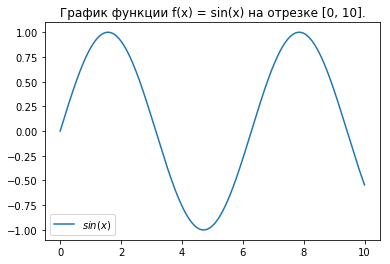

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('График функции f(x) = sin(x) на отрезке [0, 10].')
plt.plot(np.linspace(0, 10, 10000), [np.sin(i) for i in np.linspace(0, 10, 10000)], label=r'$sin(x)$')
plt.legend(loc=0)
plt.show()


3) Постройте графики еще нескольких элементарных функций (на том
же рисунке) и сделайте к ним подписи (легенду) с формулами (в подписях
можно использовать LATEX, как обычно, в знаках $). Добавьте
какие-нибудь подписи к осям координат и название графика. Сохраните
изображение в файл одной строчкой на Python.


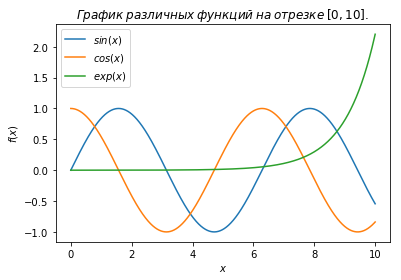

In [45]:
plt.title(r'$График \: различных \: функций \: на \: отрезке \: [0, 10].$')
plt.plot(np.linspace(0, 10, 10000), [np.sin(i) for i in np.linspace(0, 10, 10000)], label=r'$sin(x)$')
plt.plot(np.linspace(0, 10, 10000), [np.cos(i) for i in np.linspace(0, 10, 10000)], label=r'$cos(x)$')
plt.plot(np.linspace(0, 10, 10000), [np.exp(i)/10000 for i in np.linspace(0, 10, 10000)], label=r'$exp(x)$')
plt.legend(loc=0)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
#plt.show()

plt.savefig('my_functions.png', format='png', dpi=100)

4) Изучите документацию matplotlib и попробуйте построить на одном
изображении 4 системы координат, на верхних двух - квадратичную
и кубическую параболы, на нижних - экспоненту и логарифм

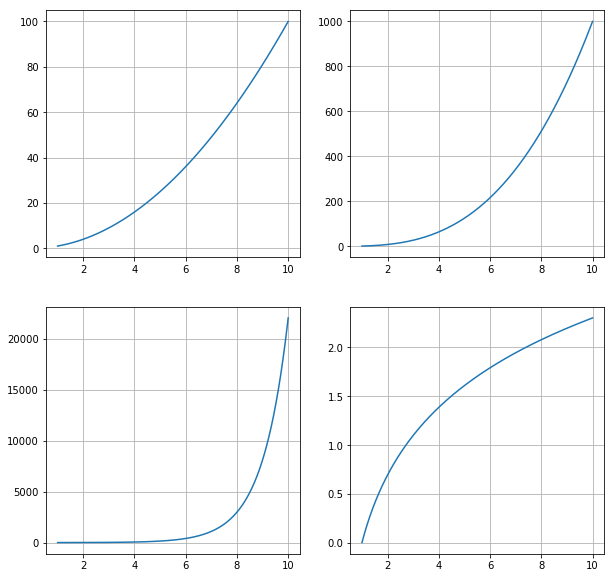

In [46]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 10))

ax1 = plt.subplot2grid((2,2), (0, 0))
ax2 = plt.subplot2grid((2,2), (0, 1))
ax3 = plt.subplot2grid((2,2), (1, 0))
ax4 = plt.subplot2grid((2,2), (1, 1))

for num, ax in enumerate(fig.axes):
    i += 1
    if num == 0:
        ax.plot(np.linspace(1, 10, 1000), list(map(lambda x: x ** 2, np.linspace(1, 10, 1000))))
    elif num == 1:
        ax.plot(np.linspace(1, 10, 1000), list(map(lambda x: x ** 3, np.linspace(1, 10, 1000))))
    elif num == 2:
        ax.plot(np.linspace(1, 10, 1000), list(map(lambda x: np.exp(x), np.linspace(1, 10, 1000))))
    else:
        ax.plot(np.linspace(1, 10, 1000), list(map(lambda x: np.log(x), np.linspace(1, 10, 1000))))
    ax.grid(True)

plt.show()

5) Изучите вопрос построения heatmap и изобразите его для функции
$f(x, y) = 3xy + x − 2y$ в области $[0; 5]^2$.

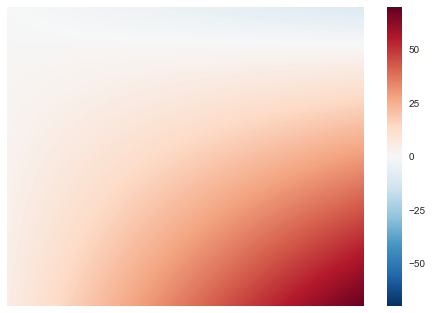

In [47]:
# Использую данную библиотеку, так как именно с ней был пример на семинаре.

import seaborn as sns

data = np.zeros(shape=(1000, 1000))
for x in range(1000):
    for y in range(1000):
        data[x, y] = 3 * x/1000*5 * y/1000*5 + x/1000*5 - 2 * y/1000*5
        
ax = sns.heatmap(data, xticklabels=False, yticklabels=False)

6) А теперь постройте трехмерный график той же функции в той же
области.


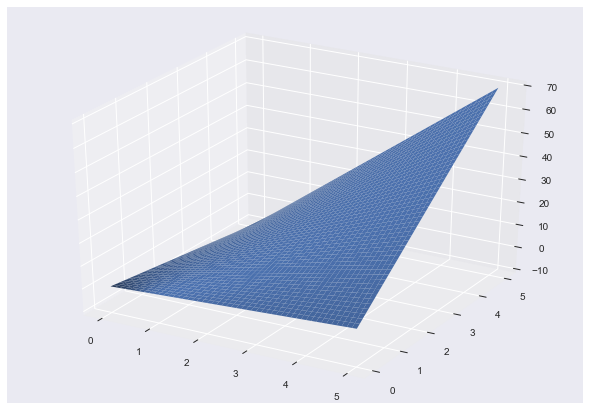

In [50]:
from mpl_toolkits.mplot3d import Axes3D

def makeData ():
    x = np.linspace(0, 5, 1000)
    y = np.linspace(0, 5, 1000)
    xgrid, ygrid = np.meshgrid(x, y)

    zgrid = 3 * xgrid * ygrid + xgrid - 2 * ygrid
    return xgrid, ygrid, zgrid

x, y, z = makeData()
fig = plt.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, z)
plt.show()

## 5 Всё вместе + SciPy

Сгенерируйте точки $(y, x)$ ($500$ будет достаточно), удовлетворяющие зависимости
$y = x^3 + 2x^2 − 3x + 2$, затем, с помощью numpy.random добавьте к
координатам y нормальный шум. С помощью scipy восстановите исходную
зависимость, считая известной степень полинома. Вам поможет curvefit или
scipy.optimize.minimize, запущенный для суммы квадратичных отклонений.
У восстановленной зависимости найдите экстремумы численно. Покажите
на графике все вместе: исходные точки, восстановленную зависимость, найденные
экстремумы.

Дополнительное задание: подберите коэффициенты многочлена, точно
проходящего через точки (без добавления нормального шума), составив и
решив с помощью scipy систему линейных уравнений.

Found coeffs: [ 1.02447203  2.02707654 -3.1860579   1.98600316]


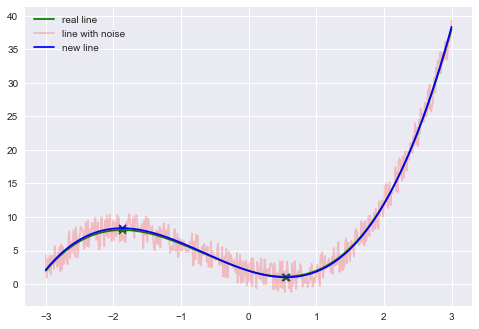

In [51]:
# Я не очень понял условие сформулированной задачи, поэтому проинтерпретировал я его следующим образом:
# 1) Для начала рассмотрим функцию на интервале [-3, 3], так как на нём она принимает небольшие значения +
# имеет как максимум, так и минимум.
# 2) Далее внесём нормальный шум в координаты по оси ординат.
# 3) Потом, используя функцию curve_fit() посчитаем востановим исходную зависимость по данным с шумом.
# Отмечу, что я не понял, почему не было предложено использовать np.polyfit(func, 3), это же проще)
# 4) Далее нахожу с помощью scipy.optimize.minimize() локальные минимумы и максимумы функции, коэффициенты
# для которой мы нашли по данным с шумом.
# 5) Далее нахожу с помощью scipy.optimize.minimize() локальные минимумы и максимумы исходной функции.
# 6) Изображаю всё на графике.

from scipy.optimize import curve_fit, minimize

x_real = np.linspace(-3, 3, 500)
y_real = np.array([x ** 3 + 2 * x ** 2 - 3 * x + 2 for x in x_real])
y_new = list(map(lambda y: y + (np.random.rand() - 0.5) * 5, y_real))

def func(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

popt, pcov = curve_fit(func, x_real, y_new)
print('Found coeffs:', popt)

min_new = minimize(lambda x: +(popt[0] * x ** 3 + popt[1] * x ** 2 + popt[2] * x + popt[3]), 0, method='Nelder-Mead').x[0]
max_new = minimize(lambda x: -(popt[0] * x ** 3 + popt[1] * x ** 2 + popt[2] * x + popt[3]), 0, method='Nelder-Mead').x[0]
min_real = minimize(lambda x: +(x ** 3 + 2 * x ** 2 - 3 * x + 2), 0, method='Nelder-Mead').x[0]
max_real = minimize(lambda x: -(x ** 3 + 2 * x ** 2 - 3 * x + 2), 0, method='Nelder-Mead').x[0]

plt.plot(x_real, y_real, color='g', label='real line')
plt.plot(x_real, y_new, color='r', label='line with noise', alpha=0.2)
plt.plot(x_real, list(map(lambda x: +(popt[0] * x ** 3 + popt[1] * x ** 2 + popt[2] * x + popt[3]), x_real)), color='b',
        label='new line')
plt.scatter(min_new, popt[0] * min_new ** 3 + popt[1] * min_new ** 2 + popt[2] * min_new + popt[3], linewidths=10, marker="x",
           color='b')
plt.scatter(max_new, popt[0] * max_new ** 3 + popt[1] * max_new ** 2 + popt[2] * max_new + popt[3], linewidths=10, marker="x",
           color='b')
plt.scatter(min_real, min_real ** 3 + 2 * min_real ** 2 - 3 * min_real + 2, linewidths=100, marker="x",
           color='g')
plt.scatter(max_real, max_real ** 3 + 2 * max_real ** 2 - 3 * max_real + 2, linewidths=10, marker="x",
           color='g')
plt.legend(loc=0)
plt.show()

Так как многочлен ТОЧНО проходит через все точки, то я решал следующую систему:

In [52]:
# Как я понял, в доп. задании степень многочлена = 499.

X = np.vander(x_real)
np.linalg.solve(X, y_real)

array([  9.40730227e-40,  -4.94858897e-39,  -6.19710645e-38,
         2.84090950e-37,   1.67302218e-36,  -5.89162728e-36,
        -2.36037456e-35,   3.87966769e-35,   1.93787240e-34,
         3.39635593e-34,  -1.28805770e-33,  -5.67296828e-33,
         1.20107276e-32,   8.74334420e-34,  -1.06421956e-31,
         3.67439072e-31,   6.25432041e-31,  -2.71082964e-30,
        -1.34996531e-30,   1.63065856e-29,  -3.45121632e-29,
        -7.35717723e-29,   2.10139165e-28,   1.87948051e-30,
         3.57370933e-27,  -4.36754612e-27,  -1.40748923e-26,
         5.23514232e-26,  -3.35248704e-25,  -2.12159916e-25,
        -6.30327671e-27,   4.36616274e-24,   3.15708537e-23,
        -2.61238208e-23,  -7.09541550e-23,  -2.23040105e-22,
        -2.86235208e-22,   7.46924341e-22,  -5.37924398e-21,
         2.00010600e-20,  -4.71475718e-21,  -5.49185830e-20,
         2.37907363e-19,  -1.33096419e-18,   3.36958873e-18,
         7.42468253e-18,  -1.81997801e-17,   6.02616760e-17,
        -1.61802584e-16,

## 6 Pandas + Scikit-learn

Считайте выборку из примера про детектирование кожи на фотографии с
семинара с помощью библиотеки pandas. Продемонстрируйте индексацию
по строкам и столбцам, labeled-based и index-based. Добавьте в DataFrame
столбцы, соответствующие попарным произведениям признаков и модулям
попарных разностей. Запустите на исходных признаках и на модифициро-
ванных KNeighboursClassifier, LogisticRegression и Random Forest из sklearn
и сравните качество работы каждого метода до и после преобразования
признаков.

In [53]:
import pandas as pd

In [54]:
# Cчитаем данные.

data = pd.read_table('Skin_NonSkin.txt', header=None)

In [55]:
# Посмотрим на первые 5 строк в таблице.

data.head(5)

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


Продемонстирую основные примеры работы с pd.DataFrame().

In [56]:
# Посмотрим, например, на второй столбец.

data[1]

0          85
1          84
2          83
3          81
4          81
5          80
6          81
7          81
8          87
9          87
10         88
11         88
12         88
13         89
14         85
15         86
16         86
17         85
18         84
19         85
20         88
21         91
22         91
23         92
24         92
25         91
26         88
27         86
28         86
29         87
         ... 
245027    161
245028    161
245029    161
245030    161
245031    161
245032    161
245033    164
245034    164
245035    164
245036    164
245037    164
245038    163
245039    163
245040    163
245041    162
245042    162
245043    162
245044    162
245045    162
245046    162
245047    162
245048    162
245049    162
245050    162
245051    162
245052    162
245053    162
245054    162
245055    162
245056    255
Name: 1, Length: 245057, dtype: int64

In [57]:
# Посмотрим на 2-ую строчку. Отметим, что метод .ix устарел. Нужно использовать либо .loc,
# либо .iloc (в зависимости от того, что мы хотим получить: индексацию по значениям или по индексам.)

data.loc[1]

0     73
1     84
2    122
3      1
Name: 1, dtype: int64

In [58]:
# Выберем только те строчки, в которых значение первого признака больше 155.

data_2 = data[data[0] > 155]
data_2

,0,1,2,3
74,156,185,230,1
75,164,190,236,1
76,165,189,235,1
77,168,190,238,1
78,168,189,244,1
79,170,190,247,1
80,175,195,250,1
81,180,201,253,1
82,187,203,255,1
83,192,207,255,1


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=0)

Запускаю на исходных признаках KNeighborsClassifier.

In [61]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(sum(y_test == predicted) / len(y_test))

0.999496721891


Запускаю на исходных данных LogisticRegression.

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(sum(y_test == predicted) / len(y_test))

0.918645773824


Запускаю на исходных данных RandomForestClassifier.

In [63]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(sum(y_test == predicted) / len(y_test))

0.999374302892


Добавим в DataFrame столбцы, соответствующие попарным произведениям признакам и модулям попарных разностей.

In [64]:
# Создадим новый объект DataFrame, в котором будет представлена изменённая таблица.

data_new = data.copy()

In [65]:
for i in range(4):
    for j in range(4):
        if i < j:
            data_new[r'${} \cdot {}$'.format(i, j)] = data_new[i] * data_new[j]
            data_new[r'$|{} - {}|$'.format(i, j)] = abs(data_new[i] - data_new[j])

In [66]:
data_new.head(5)

,0,1,2,3,$0 \cdot 1$,$|0 - 1|$,$0 \cdot 2$,$|0 - 2|$,$0 \cdot 3$,$|0 - 3|$,$1 \cdot 2$,$|1 - 2|$,$1 \cdot 3$,$|1 - 3|$,$2 \cdot 3$,$|2 - 3|$
0,74,85,123,1,6290,11,9102,49,74,73,10455,38,85,84,123,122
1,73,84,122,1,6132,11,8906,49,73,72,10248,38,84,83,122,121
2,72,83,121,1,5976,11,8712,49,72,71,10043,38,83,82,121,120
3,70,81,119,1,5670,11,8330,49,70,69,9639,38,81,80,119,118
4,70,81,119,1,5670,11,8330,49,70,69,9639,38,81,80,119,118


In [67]:
X_train, X_test, y_train, y_test = train_test_split(data_new.iloc[:, data_new.columns != 3],
                                                    data_new.iloc[:, 3], test_size=0.3, random_state=0)

Запускаю на модифицированных признаках KNeighborsClassifier.

In [68]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(sum(y_test == predicted) / len(y_test))

0.999251883892


Запускаю на модифицированных данных LogisticRegression.

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(sum(y_test == predicted) / len(y_test))

0.999007045894


Запускаю на модифицированных данных RandomForestClassifier.

In [70]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(sum(y_test == predicted) / len(y_test))

1.0


Для KNeighborsClassifier качество особо не изменилось. Для LogisticRegression качество повысилось. Для RandomForestClassifier качество стало просто запредельным:).